### Generate N muons on top of the tank with a cos^2 theta uniform distribution. Compute the energy deposited in the tank as a function of the tank depth   

In [1]:
import numpy as np 
from astropy import units as u 
import matplotlib.pyplot as plt
import matplotlib as mpl
%run functions.py 

In [2]:
# Water properties
Z_A=0.55509 *u.mol / u.g #mol g^-1, atomic number Z over atomic mass mol g^-1 
rho=1 * u.g / u.cm**3 #g cm^-3, density of liquid water 
I=7.97e-5 * u.MeV #MeV, mean excitation energy

K=0.307075 * u.MeV * u.cm **2 / u.mol #MeV mol^−1 cm2


In [33]:
N_event = 1000 # Choose number of particles 

# Tank dimentions 
R_tank = 180 * u.cm 
H_tank = 120 * u.cm

# Gen. surface radius 
R_gen = 180 * u.cm 
 
# Extract starting position randomly from a circle corresponding to the top of the tank

def rnd_tank_start(R_gen, N_event): 
    #r = R_gen * np.sqrt(np.random.uniform(0,1,size=N_event))
    r = R_gen * (np.random.uniform(0,1,size=N_event))
    alpha = np.random.uniform(0,2*np.pi, size=N_event) 
    x0 = r * np.cos(alpha)   
    y0 = r * np.sin(alpha)  
    z0 = np.full(N_event,0) * u.cm
    return x0, y0, z0   

# Extract starting direction 

def rnd_direction(N_event):
    phi = np.random.uniform(0,2*np.pi, size=N_event)
    cos_theta_squared = np.random.uniform(0,1, size=N_event)
    theta = np.arccos(np.sqrt(cos_theta_squared)) 
    #theta = np.full(N_event,0)
    return theta, phi

In [34]:
# Track muons inside the tank, considering energy loss and Cherenkov produciton 

muon_theta, muon_phi = rnd_direction(N_event)
x0,y0,z0 = rnd_tank_start(R_gen, N_event)  
      

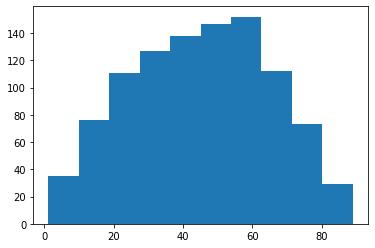

In [35]:
theta_hist = plt.hist(muon_theta*180/np.pi)

In [30]:
coor_muon = [] 
r_photon = []
z_photon = []
nph_muon = []

for i in range(N_event) :
    muon_pos = Vector(x0[i],y0[i],z0[i],muon_theta[i],muon_phi[i]) 
    step_size = 1. * u.cm
    
    ek_mu = 1 * u.GeV
    beta_mu = _beta(ek_mu,m0)    
    gamma_mu = _gamma(ek_mu,m0)    
    Wmax_mu = _Wmax(ek_mu,m0)    

    while (muon_pos.in_tank()):
        coor_muon.append([muon_pos.x,muon_pos.y,muon_pos.z])
        
        eloss1 = de_dx_muon(beta_mu,gamma_mu,Wmax_mu,K, Z_A, I, rho ) * step_size
        ek_mu = ek_mu - eloss1 
        
        beta_mu = _beta(ek_mu,m0)    
        gamma_mu = _gamma(ek_mu,m0)    
        Wmax_mu = _Wmax(ek_mu,m0)    
    
        lam_array, n_ch_mean = cherenkov_photons_array(beta_mu,step_size) 
        n_ch = np.random.poisson(n_ch_mean)
        ch_r, ch_z = muon_pos.rnd_ch_photon_pos(np.sum(n_ch))
        r_photon.extend(ch_r)
        z_photon.extend(ch_z)
                        
        muon_pos.update_pos(step_size) 


        
#coor_array = np.asarray(coor_muon)

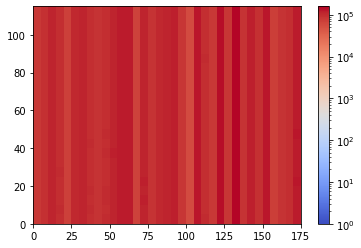

In [31]:
r_bins = np.arange(0,180,5)
z_bins = np.arange(0,120,5)
hist2d = plt.hist2d(r_photon, z_photon, bins=[r_bins,z_bins], norm=mpl.colors.LogNorm(vmin=1), cmap = plt.cm.coolwarm)
#hist2d = plt.hist2d(r_photon, z_photon, bins=[r_bins,z_bins], cmap = plt.cm.coolwarm, vmin=1)
plt.colorbar()


In [32]:
# Save data in a h5 file 
import h5py

hf = h5py.File('./output/muon_cherenkov_'+str(N_event)+'_vertical.h5','w')
hf.create_dataset('Radius', data=r_photon)
hf.create_dataset('Z', data=z_photon)
hf.close()

In [79]:
print((_photon[0:10]))

[2.7841046944010802e-05, 0.4239003259253175, 0.1665337239612759, 0.36216217064376566, 0.04533685609386742, 0.5674977011660669, 0.32341667022032816, 0.13763252712203006, 0.3912980860624295, 0.6039473015985436]
